# Portfolio Analysis


In [6]:
#Imports 
import pandas as pd
import numpy as np
from pathlib import Path 
%matplotlib inline

In [7]:
#Data
data = pd.read_csv('portfolio_analysis.csv', index_col=[0])

In [8]:
data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [9]:
# Creating daily returns dataframe and omitting rows with 
# missing values 
df = pd.DataFrame(data)
df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26
...,...,...,...,...,...
2020-09-04,31.546221,14.364969,63.319419,64.668648,342.57
2020-09-08,31.491425,14.337851,63.238988,64.344083,333.21
2020-09-09,31.526541,14.368297,63.409792,64.460992,339.79


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 2014-10-01 to 2020-09-11
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SOROS FUND MANAGEMENT LLC    1498 non-null   float64
 1   PAULSON & CO.INC.            1498 non-null   float64
 2   TIGER GLOBAL MANAGEMENT LLC  1498 non-null   float64
 3   BERKSHIRE HATHAWAY INC       1498 non-null   float64
 4   S&P 500                      1498 non-null   float64
dtypes: float64(5)
memory usage: 70.2+ KB


In [11]:
daily_returns= df.pct_change().dropna()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


## Quantitative Analysis
 Here we analyse the performance, volatiity, risk and risk-return profile individually to diversify a portfolio. 

### Performance Analysis
 Here we determine if any of the portfolios perform better than the broader stock market that S&P 500 represents. 

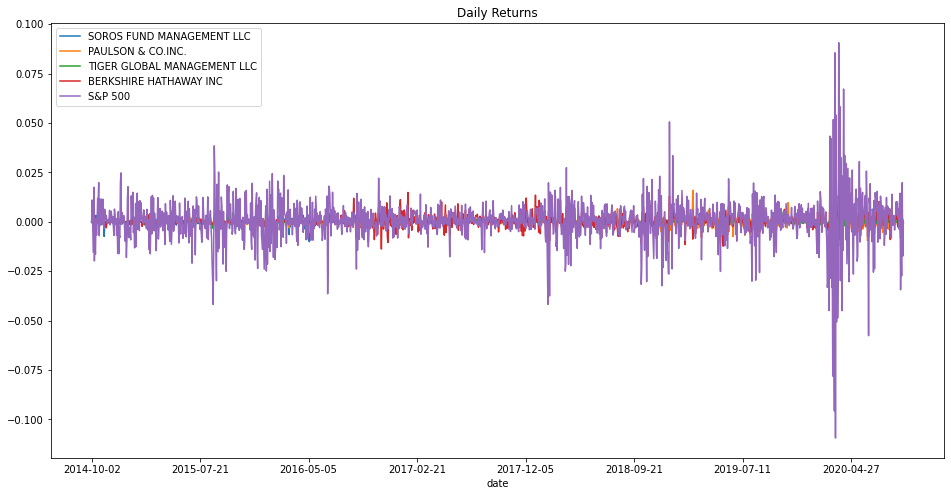

In [12]:
#Visualize the daily returns 
daily_returns.plot(figsize= (16,8),title = 'Daily Returns')


In [13]:
# Calculating cumulative returns 
cum_returns = (1+ daily_returns).cumprod()
cum_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


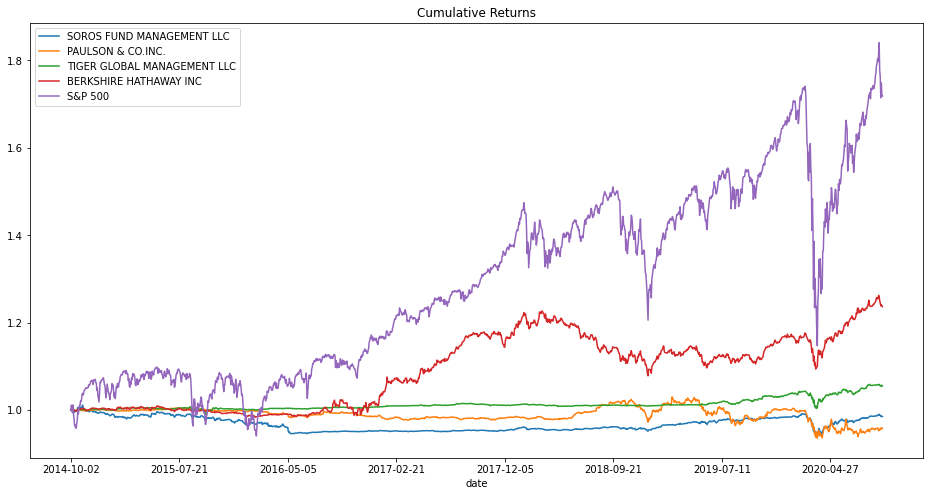

In [14]:
#Vizualizing cumulative returns 
cum_returns.plot(figsize=(16,8),title= 'Cumulative Returns')

From the above plot, it does not look like any fund has outperformed the S&P 500 index. 

### Volatility Analysis 


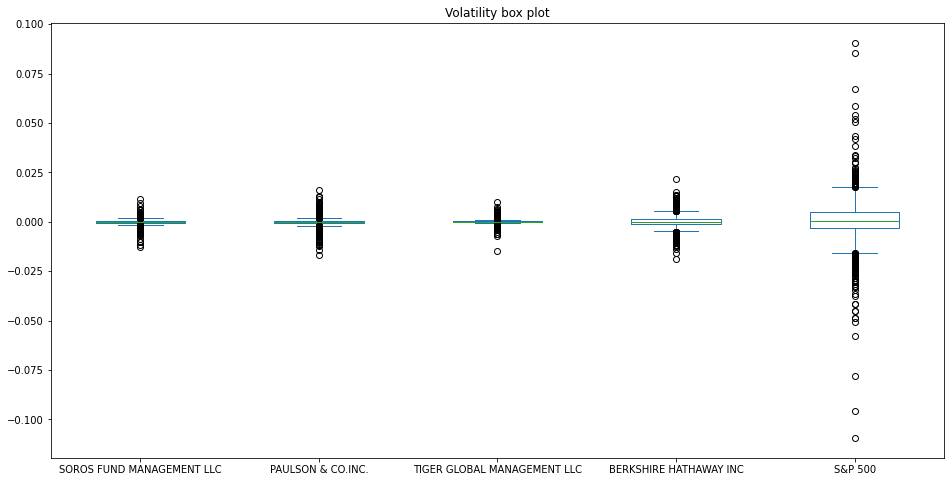

In [15]:
# Box plots of daily returns to visualize the spread
daily_returns.plot(kind= 'box', figsize=(16,8), title='Volatility box plot')

Based on the box plot visualization of the four portfolios, we see that Berkshire Hathaway appears to have the largest spread and is therefore the most volatile while Tiger Global Management LLC is the least volatile with the smallest spread. 

### Risk Analysis 
 We will evaluate the risk profile of each portfolio by using standard deviation and beta. 

In [16]:
#standard deviation calculation of each portfolio 
daily_returns_sd = daily_returns.std()
daily_returns_sd.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [17]:
#annual standard deviation calculation of each portfolio
#multiply daily_returns_sd by sqrt of number of trading days

annual_sd = daily_returns_sd * (252)**0.5

In [18]:
annual_sd

SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
TIGER GLOBAL MANAGEMENT LLC    0.015804
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

Based on the annualized standard deviation, S&P 500's standard deviation is the highest(18.33%) representing the most volatility. Berkshire Hathaway is closest to S&P 500 as it shows an annualized standard deviation of 5.17% 

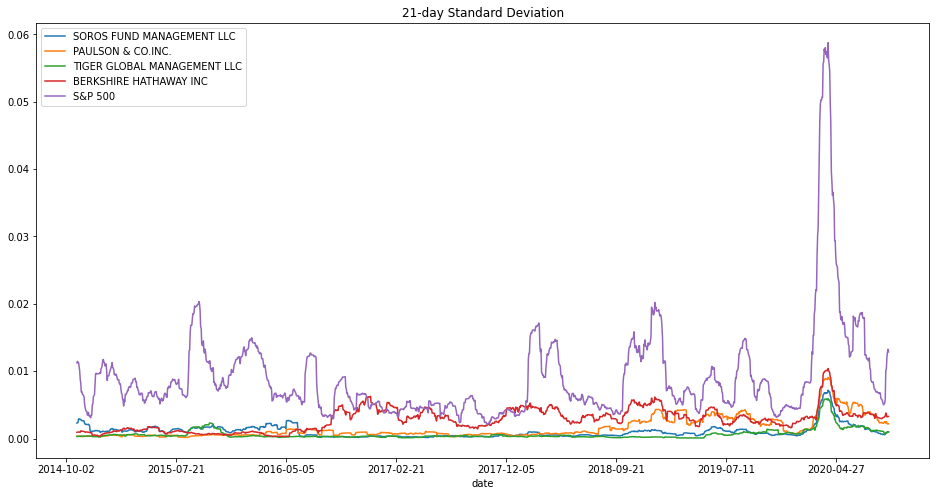

In [19]:
#rolling standard deviation calculation of each portfolio 
# 21 day rolling window 

rolling_sd = daily_returns.rolling(window=21).std()
rolling_sd.plot(figsize= (16,8), title= '21-day Standard Deviation')

From this plot, we can see that the standard deviations of the four portfolios seem to have a correlation to that of S&P 500 in 2020 but have remained stable in terms of volatility compared to S&P 500. <br>
  Also, apart from S&P 500, Berkshire Hathaway seems to pose the most risk compared to other portfolios. 

### Risk-Return Profile Analysis 


In [22]:
#calculation of annual average returns for the portfolios
#number of trading days = 252

average_annual_returns = daily_returns.mean()* 252
average_annual_returns.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [24]:
#calculation of Sharpe ratios for the portfolios 
#sharpe ratios = annualized average return/annaulized SD

sharpe_ratios= average_annual_returns/ annual_sd
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

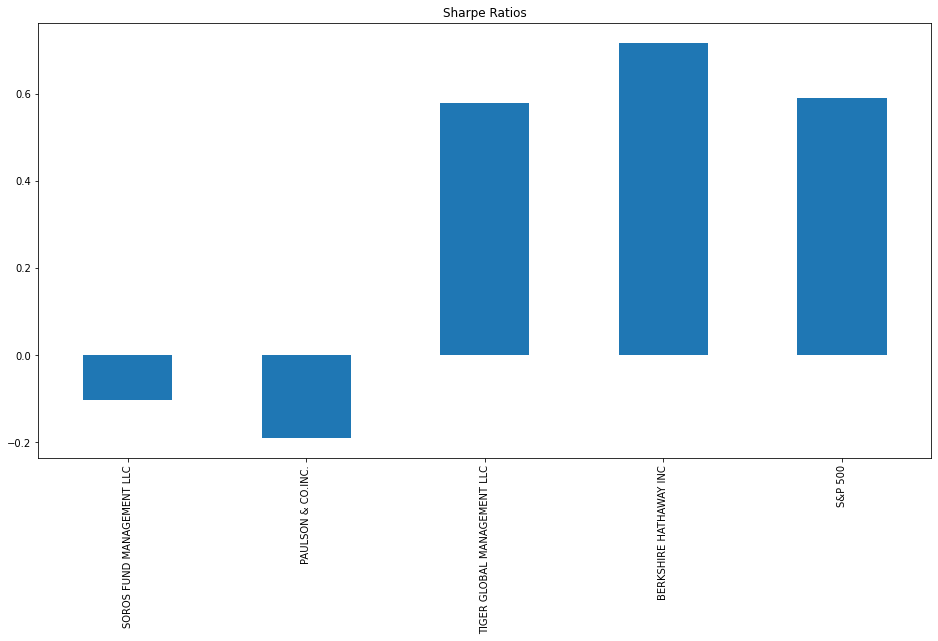

In [25]:
#visualizing sharpe ratios
sharpe_ratios.plot(kind='bar',figsize=(16,8),title='Sharpe Ratios')

From the above plot, we can see that Berkshire Hathaway Inc offers the best risk-return profile. Paulson & Co. Inc offers the worst risk-return profile among the given portfolios. So we will omit Paulson& Co. INC from our investment options. 
<br>
<br>
  Berkshire Hathaway and Tiger Global management would be my top recommendations but further analysis will confirm this. 

### Portfolio diversification  
 Based on our analysis, we will choose the best investment option. 

 

In [27]:
#calculation of variance of s&p 500 using rolling 60-day window
rolling_var = daily_returns.rolling(window=60).var()
rolling_var.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.000001,0.000009,0.000002,0.000012,0.000103
2020-09-08,0.000001,0.000009,0.000002,0.000012,0.000116
2020-09-09,0.000001,0.000009,0.000002,0.000012,0.000120
2020-09-10,0.000001,0.000009,0.000002,0.000012,0.000121
2020-09-11,0.000001,0.000009,0.000002,0.000012,0.000120


In [30]:
#calcualtion of covariance between Berkshire/Tiger and S&P 500  
#for a 60-day rolling window 

rolling_cov1 = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_cov1.tail()


date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [31]:
rolling_cov2 = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(daily_returns['S&P 500'])
rolling_cov2.tail()

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [33]:
#calculation of beta of the portfolio
#beta = cov. of portfolio/ var. of S&P 500

beta_berkshire = rolling_cov1/ rolling_var['S&P 500']
beta_berkshire.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [34]:
beta_tiger = rolling_cov2/ rolling_var['S&P 500']
beta_tiger.tail()

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

In [35]:
#average value of 60-day rolling beta 
beta_berkshire.mean()

0.2214986101354593

In [36]:
beta_tiger.mean()

0.03093001487238774

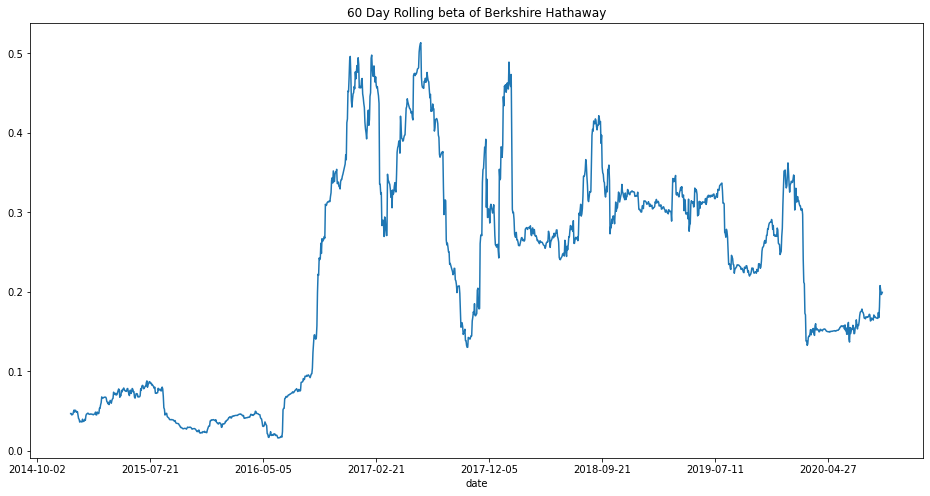

In [37]:
#plotting the rolling beta 
beta_berkshire.plot(figsize=(16,8),title='60 Day Rolling beta of Berkshire Hathaway')

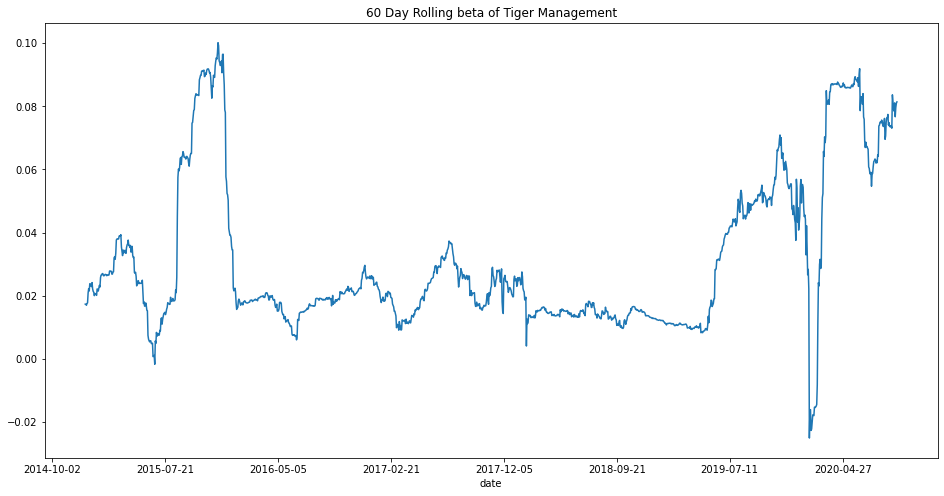

In [39]:
beta_tiger.plot(figsize=(16,8),title='60 Day Rolling beta of Tiger Management')

Remarks: <br>
1. Berkshire Hathaway is more sensitive to movements of S&P 500.
2. Berkshire Hathaway would be my top investment recommendation. 